In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
#Se cambia el tamaño por defecto de los plots
plt.rcParams['figure.figsize'] = [10.0, 8.0]

### Introducción
La transformada de Fourier tiene una importancia fundamental en la representación y análisis de señales y sistemas discretos. Una generalización de ella es la transformada Z.

El motivo principal para tratar con la transformada Z consiste en que la transformada de Fourier no converge para todas las secuencias; lo que hace necesario plantear una transformación que cubra una más amplia gama de señales.

Adicionalmente, la transformada Z presenta la ventaja de que, en problemas analíticos, el manejo de su notación, expresiones y álgebra es con frecuencia más conveniente.

El empleo de la transformada Z en señales discretas tiene su equivalente en la transformada de Laplace para señales continuas y cada una de ellas mantiene su relación correspondiente con la transformada de Fourier.

Anteriormente se definió la Transformada Discreta de Fourier (DFT) de una secuencia $x(k)$ como:

$$x(\Omega)=X(e^{j\omega})=\sum_{k=-\infty}^{\infty}x(k)e^{-j\omega k}$$

La Transformada Z de la misma secuencia se define como:

$$x(z)=\sum_{k=-\infty}^{\infty}x(k)z^{-k}$$ 

La cual es un operador que transforma una secuencia en una función de la variable compleja continua $z$.

Es importante destacar que existe una relación muy cercana entre la transformada de Fourier y la transformada Z; en particular, si se observa la sustitución de la variable compleja $e^{j\omega}$ por la variable compleja $z$. Cuando existe, la transformada de Fourier es simplemente $X(z)$ con $z=e^{j\omega}$.

Si tomamos $z=re^{j\omega}$, la ecuación de la transformada Z resulta:

$$x(re^{j\omega})=\sum_{k=-\infty}^{\infty}x(k)(re^{j\omega})^{-k}$$

$$x(re^{j\omega})=\sum_{k=-\infty}^{\infty}x(k)r^{-k}e^{-j\omega k}$$

La ecuación previa se interpreta como la transformada de Fourier del producto $x(k)$ con la secuencia $r^{−k}$. Obviamente si $r=1$, la ecuación  se reduce a la transformada de Fourier de $x(k)$

La descripción e interpretación de la transformada en el plano complejo permite una más amplia visualización de la relación entre ambas transformadas.

![circulo_unitario](img/circulo_unitario.png)

La región del plano en donde $|z|=1$ corresponde a una circunferencia de
radio igual a uno, la circunferencia unitaria. La transformada $X(z)$ evaluada en los puntos de dicha circunferencia es la transformada de
Fourier $X(e^{jω})$.

Un sistema, que tiene todos sus polos en el circulo unitario, es un sistema estable.

## Ejercicio

1. Implementar un metodo que realize la transformada Z (Unilateral) de una secuencia dicreta.
2. Realizar la transformada de fourier sobre el sistema de ecuaciones diferenciales elegido en el TP06 y determinar la frecuencia obtima de muestreo (Nyquist Rate).
3. Muestrear teniendo en cuenta el Nyquist Rate, definido previamente, Sistema de EDOs utilizado en el TP06
4. Realizar la transformada z de la salida del sistema y determinar (Graficamente) bajo que condiciones el mismo es un sistema estable.

## Solución de Ejemplo (Pendulo)

Primero, graficamos el sistema de ecuaciones diferenciales utilizado

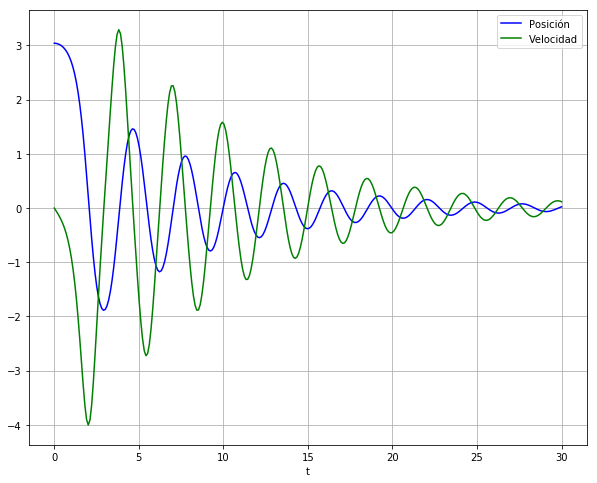

In [10]:
# Resuelvo el sistema de ecuaciones 
from scipy.integrate import odeint
import numpy as np

def pend(y, t, b, c):
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt

b = 0.25
c = 5.0

y0 = [np.pi - 0.1, 0.0]

t = np.linspace(0, 30, 300)

sol = odeint(pend, y0, t, args=(b, c))

plt.plot(t, sol[:, 0], 'b', label='Posición')
plt.plot(t, sol[:, 1], 'g', label='Velocidad')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

Implemto metodo para realizar la transformada Z

In [11]:
def trans_z_unilateral(x, z):
    zt = 0
    ## INGRESE SU CODIGO ACA ##
    return zt

Aplico Fourier y grafico para determinar las frecuencia de funcionamiento del sistema.

In [12]:
from scipy.fftpack import fft

N = t.size
T = 1.0 / 1200.0

y0f = fft(sol[:, 0])
y1f = fft(sol[:, 1])

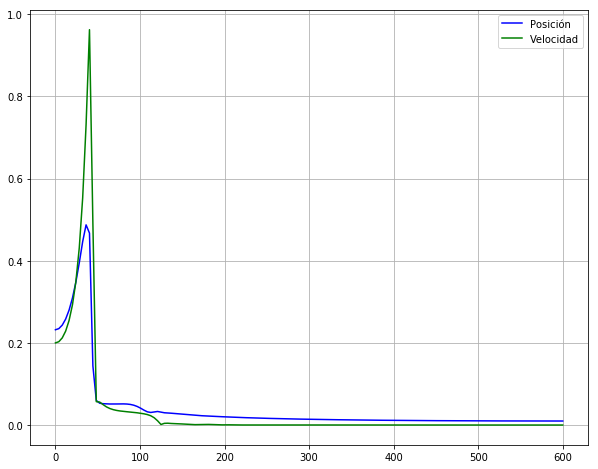

In [13]:
import matplotlib.pyplot as plt
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.plot(xf, 2.0/N * np.abs(y0f[0:N//2]), 'b', label='Posición')
plt.plot(xf, 2.0/N * np.abs(y1f[0:N//2]), 'g', label='Velocidad')

plt.legend(loc='best')
plt.grid()
plt.show()

Graficamente, podemos ver que el sistema utiliza frecuencias que van dede 0 a 600. Por ende nuestros rate obtimo de muestreo es $rate={1\over 2*600}={1\over 1200}$.

Realizamos el muestreo de nuestro sistema:

In [14]:
b = 0.25
c = 5.0

y0 = [np.pi - 0.1, 0.0]

# Realizo el muestreo de los 10 primero segundo por cuestiones practicas
# No tomo un rate de nuestras de 1/1200 porque solo estoy muestreando hasta t=10
seg = 20
rate = 400
t = np.linspace(0, seg, seg*rate)

sol = odeint(pend, y0, t, args=(b, c))

Realizo la transformada Z de todo el muestreo de la pocisión y grafico la transformación en el plano Z (Posición del sistema):

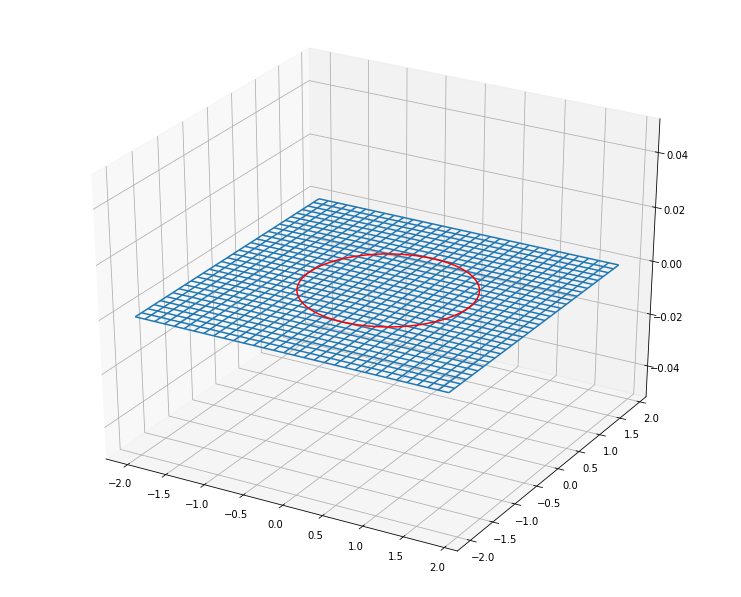

In [15]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pylab
import numpy as np
import mpmath
mpmath.dps = 5

f = lambda z: trans_z_unilateral(sol[:, 0], z)

fig = pylab.figure()
ax = Axes3D(fig)
X = np.arange(-2, 2, 0.125)
Y = np.arange(-2, 2, 0.125)
X, Y = np.meshgrid(X, Y)
xn, yn = X.shape
W = X*0
for xk in range(xn):
    for yk in range(yn):
        try:
            z = complex(X[xk,yk],Y[xk,yk])
            w = float(f(z))
            if w != w:
                raise ValueError
            W[xk,yk] = w
        except (ValueError, TypeError, ZeroDivisionError, OverflowError):
            # can handle special values here
            pass
    
an = np.linspace(0, 2*np.pi, 100)
r=1 #radio del circulo
ax.plot(r*np.cos(an), r*np.sin(an), zs=0, zdir='z', c='r', label='Circulo Unitario')

ax.plot_wireframe(X, Y, W, rstride=1, cstride=1)

Como se puede ver, todos los polos del sistema se encuentran dentro del circulo unitario. Por lo que el sistema, con las condiciones actuales, es un sistema estable.